In [ ]:
! pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
df3=pd.read_csv('CID-active-inactive.csv')
df3

,cid,\tbioactivity_class,canonical_smiles\t
0,11364421,Active,CC[C@@H]1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=...
1,137347776,Active,CC[C@@H]1C(=O)N(C2=CN=C(N=C2N1CC3=CC(=CS3)C)NC...
2,11364421,Active,CC[C@@H]1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=...
3,11364421,Active,CC[C@@H]1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=...
4,4719406,Active,COC1=C(C=C(C=C1)CCNCC2=CC(=C(C=C2)OCC3=CN=C(C=...
...,...,...,...
13088,68178481,Inactive,CC1=CC2=C(S1)N=CN=C2SCC(=O)NC
13089,121494135,Inactive,CNC(=O)C1=CC(=C(S1)C(F)(F)F)C2=CC=CC=C2
13090,121493729,Inactive,CC1=[N+](C(C=C1C(=O)NC)CCCN2CCOCC2)C3=CC=CC=C3
13091,68178482,Inactive,CC1=C(C=C(N1C2=CC=CC=C2)C3=CC=CC=C3)C(=O)NC


In [ ]:
smiles_list = df4['canonical_smiles\t'].tolist()
smiles_list

['CCN1N=C(N=N1)NC(C2=CC=C(C=C2)F)P(=O)(OCC(C)C)OCC(C)C',
 'CC1CC1C(=O)N(C)CC(=O)NC2=CC(=C(C=C2)Cl)C(F)(F)F',
 'COC1=CC=C(C=C1)/C=N/NC(=O)CCCCCNC(=O)C2=CC=CC=C2',
 'CCC(C)(C)NC(=O)C(C1=CC=C(C=C1)OC)N(CC2CCCO2)C(=O)CCC(=O)NC3=NOC(=C3)C',
 'C[C@@H](C(=O)NCC1=CC=CC=C1OC)N2C(=O)[C@@]3(C4=C(CCN3C2=O)C5=C(N4)C=CC(=C5)OC)C',
 'CCCCC(CC)COC(=O)C1=CC=C(C=C1)N(C)C',
 'CCC1=C(N2C=CC=C(C2=N1)OCC(=O)C3=CC=C(C=C3)F)N(C)C(=O)C(C)C',
 'C1CCC(=NCC1)NS(=O)(=O)C2=CC=C(C=C2)NC(=O)COC3=C(C=C(C=C3)Cl)Cl',
 'CCOC1=CC(=C(C=C1NC(=O)C)OCC)NC(=S)NC2=CC=C(C=C2)Cl',
 'C1C(=O)N/C(=N/N=C/2\\NC(=O)C(S2)CC(=O)NCC(=O)O)/S1',
 'CCN(CC)C1=CC2=C(C=C1)C=C(C(=O)O2)C3=NC(=CS3)C4=CC5=CC=CC=C5OC4=O.Br',
 'CCCCN1C(=O)/C(=C/C=C\\2/N(C3=CC=CC=C3O2)CC)/SC1=S',
 'CC1=CC=C(C=C1)C(=O)N2CCC(CC2)C(=O)C3=C(C=C(C=C3C)C)C',
 'CCN1/C(=C/C=C/C2=[N+](C3=C(O2)C=CC4=CC=CC=C43)CC)/OC5=C1C6=CC=CC=C6C=C5.CC1=CC=C(C=C1)S(=O)(=O)[O-]',
 'C1CCN(CC1)C2=CC3=CC(=C(C#N)C#N)CCC3CC2',
 'CCOC(=O)C1=C(SC=C1C2=CC=CC=C2)NC(=O)/C(=C\\C3=CC(=C(C=C3)O)OC)/C#N',
 

In [ ]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Calculate fingerprints
fingerprints = []
for smile in smiles_list:
    mol = Chem.MolFromSmiles(smile)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=600)
    fingerprints.append(fp)

# Convert fingerprints to NumPy arrays
from rdkit import DataStructs
import numpy as np
fingerprint_arrays = []
for fp in fingerprints:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    fingerprint_arrays.append(arr)

X = np.asarray(fingerprint_arrays)
X

In [ ]:
X1=X
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df3['\tbioactivity_class'] = df3['\tbioactivity_class'].map({'Active': 1, 'Inactive': 0})

In [ ]:
df3

,cid,\tbioactivity_class,canonical_smiles\t
0,11364421,1,CC[C@@H]1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=...
1,137347776,1,CC[C@@H]1C(=O)N(C2=CN=C(N=C2N1CC3=CC(=CS3)C)NC...
2,11364421,1,CC[C@@H]1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=...
3,11364421,1,CC[C@@H]1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=...
4,4719406,1,COC1=C(C=C(C=C1)CCNCC2=CC(=C(C=C2)OCC3=CN=C(C=...
...,...,...,...
13088,68178481,0,CC1=CC2=C(S1)N=CN=C2SCC(=O)NC
13089,121494135,0,CNC(=O)C1=CC(=C(S1)C(F)(F)F)C2=CC=CC=C2
13090,121493729,0,CC1=[N+](C(C=C1C(=O)NC)CCCN2CCOCC2)C3=CC=CC=C3
13091,68178482,0,CC1=C(C=C(N1C2=CC=CC=C2)C3=CC=CC=C3)C(=O)NC


In [ ]:
df3.to_csv('bioactivity_class-1-0.csv')

In [ ]:
df4=pd.read_excel('Book2.xlsx')
df4

,cid,bioactivity_class,canonical_smiles\t
0,613161,0,CCN1N=C(N=N1)NC(C2=CC=C(C=C2)F)P(=O)(OCC(C)C)O...
1,4857235,0,CC1CC1C(=O)N(C)CC(=O)NC2=CC(=C(C=C2)Cl)C(F)(F)F
2,5986028,0,COC1=CC=C(C=C1)/C=N/NC(=O)CCCCCNC(=O)C2=CC=CC=C2
3,3216234,0,CCC(C)(C)NC(=O)C(C1=CC=C(C=C1)OC)N(CC2CCCO2)C(...
4,16401179,0,C[C@@H](C(=O)NCC1=CC=CC=C1OC)N2C(=O)[C@@]3(C4=...
...,...,...,...
2336,1263586,1,C1=CC(=CC(=C1)NC(=O)C2=C(NN=C2)N)C(F)(F)F
2337,4989139,1,CCC1=CC=C(C=C1)C2=NN(C3=NC(=O)N(C(=O)C3=N2)C)CC
2338,168285547,1,CC[C@@H]1C2=NN=C(N2C3=CN=C(N=C3N1CC4CCCCC4)NC5...
2339,44259,1,C[C@@]12[C@@H]([C@@H](C[C@@H](O1)N3C4=CC=CC=C4...


<Axes: xlabel='bioactivity_class', ylabel='count'>

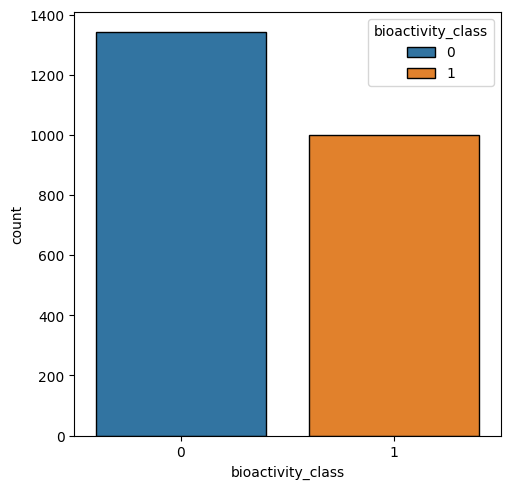

In [ ]:
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df4, edgecolor='black', hue='bioactivity_class')

In [ ]:
Class= df4['bioactivity_class']
Class=Class.values
Class

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
Y1=Class
Y1

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# Perform data splitting using 80/20 ratio
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=100)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X1_train, X1_test, Y1_train,Y1_test)

print(models)

 97%|█████████▋| 28/29 [00:46<00:00,  1.28it/s]

[LightGBM] [Info] Number of positive: 794, number of negative: 1078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2103
[LightGBM] [Info] Number of data points in the train set: 1872, number of used features: 701
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.424145 -> initscore=-0.305779
[LightGBM] [Info] Start training from score -0.305779


100%|██████████| 29/29 [00:46<00:00,  1.61s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.95               0.94     0.94      0.95   
XGBClassifier                      0.94               0.94     0.94      0.94   
PassiveAggressiveClassifier        0.94               0.94     0.94      0.94   
LGBMClassifier                     0.94               0.93     0.93      0.94   
RandomForestClassifier             0.94               0.93     0.93      0.94   
SVC                                0.94               0.93     0.93      0.94   
LogisticRegression                 0.93               0.93     0.93      0.93   
LinearSVC                          0.92               0.92     0.92      0.92   
KNeighborsClassifier               0.93               0.92     0.92      0.93   
Perceptron                         0.92               0.92     0.92      0.92   
CalibratedClassifierCV      

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_2 = RandomForestClassifier(random_state=100).fit(X1_train, Y1_train)

In [ ]:
clf_2.score(X1_test, Y1_test)

0.9402985074626866

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

In [ ]:
# Compute the ROC curve
y_score = clf_2.predict_proba(X1_test)[:, 1]  # Assuming a binary classification
fpr, tpr, thresholds = roc_curve(Y1_test, y_score, pos_label='1')
roc_auc = roc_auc_score(Y1_test, y_score)


<Figure size 640x480 with 0 Axes>

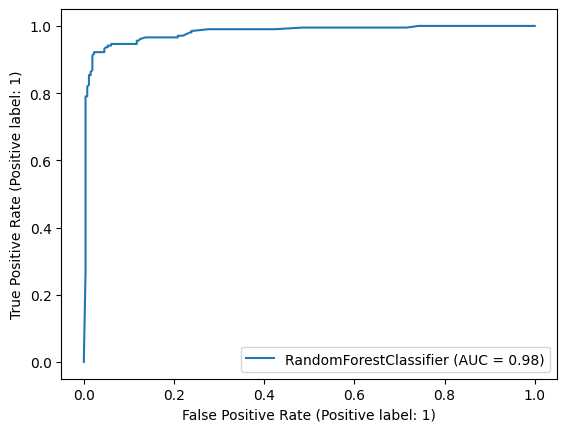

In [ ]:
# Plot the ROC curve
plt.figure()
RocCurveDisplay.from_estimator(clf_2, X1_test, Y1_test)


In [ ]:
y_pred = clf_2.predict(X1_test)
confusion_matrix( Y1_test, y_pred)

array([[ 78,   8],
       [  4, 153]])

In [ ]:
import pandas as pd
df_test=pd.read_csv('X_testout.csv')
df_test
X_testout=df_test
X_testout

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1705,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1706,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1707,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
test=pd.read_csv('output.csv')
test

,cid,acname,IC50 (uM),activity,canonical_smiles,standard_value
0,11625181,IC50,10.00,Inactive,COC1=C(C=C2C(=C1)N=CN2C3=CC(=C(S3)C#N)OCC4CCCO...,10000.00
1,5494449,IC50,10.00,Inactive,CC1=CC(=NN1)NC2=CC(=NC(=N2)SC3=CC=C(C=C3)NC(=O...,10000.00
2,52938890,IC50,10.00,Inactive,C1=CC(=CC=C1/C=C(\C#N)/C(=O)N)C2=CNN=C2,10000.00
3,131954196,IC50,10.00,Inactive,CN(C)C(=O)/C(=C/C1CCC2C(C1)C(NN2)C3=CC(=C(C(=C...,10000.00
4,52938896,IC50,10.00,Inactive,C1=NC(=C2C(=N1)N(C(=N2)/C=C(\C#N)/C(=O)N)CCCO)N,10000.00
...,...,...,...,...,...,...
1704,3849988,IC50,20.97,Active,C1=CC(=CC(=C1)Cl)CN2C(=CC=C(C2=O)C(=O)N)C(F)(F)F,20970.00
1705,6411129,IC50,28.91,Active,CCOC1=C(C=CC(=C1)C2=NC3=C(NC(=O)N(C3=O)C)N=N2)...,28911.00
1706,5401874,IC50,37.44,Active,CC1=CC=CC=C1N(C(=O)C)/N=C\2/C(=O)C3=CC=CC=C3S2,37440.00
1707,2259658,IC50,45.19,Active,CC1=CC(=C(N1C2=CC(=C(C=C2)I)C)C)C=C3C(=O)NC(=O...,45187.00


In [ ]:
class_list1 = []  # Use a more descriptive variable name
for activity in test['activity']:
    if activity == "Active":
        class_list1.append("1")
    elif activity == "Inactive":
        class_list1.append("0")


In [ ]:
Y_testout=class_list1
Y_testout= pd.DataFrame({'Y_testout':class_list1})
Y_testout=Y_testout[('Y_testout')].values
Y_testout


array(['0', '0', '0', ..., '1', '1', '1'], dtype=object)

In [ ]:
y_pred = clf_2.predict(features_test)
confusion_matrix( target_test, y_pred)

In [ ]:
y_pred = clf_2.predict(X_testout)
confusion_matrix( Y_testout, y_pred)

array([[ 299,   17],
       [ 307, 1086]])

# Because, Lazyprediction do not support for neural network. We also used convolutional neural network to train the model with 500 epochs.

# Deep learning model

# Prepare for Deep learning model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from datetime import datetime
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, AveragePooling1D, AveragePooling2D, Input

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=100)

In [ ]:
num_classes = 2
learning_rate = 0.0001
training_epochs = 500
batch_size = 25

In [ ]:
input_shape = (800,1)

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras import Sequential, Input, Model  # Import Input directly from keras
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, AveragePooling1D, AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras import backend as K
#from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU  # Import LeakyReLU from keras.layers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

# Rename the 'models' DataFrame to avoid conflicts
df_models = models

In [ ]:
values = array(Y1)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[0]


In [ ]:
onehot_encoded.shape

(2341, 2)

In [ ]:
onehot_encoded = np.array(onehot_encoded, dtype=float)

In [ ]:
X1 = np.array(X1, dtype=float)
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
Y = onehot_encoded
print(Y)
print(Y.shape)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
(2341, 2)



# Deep learning model

In [ ]:
X1_train, X1_test, Y_train, Y_test = train_test_split(
X1, Y, test_size=0.2, random_state=0)

In [ ]:
num_classes = 2
learning_rate = 0.0001
training_epochs = 100
batch_size = 25

In [ ]:
X1_train_X = np.expand_dims(X1_train, axis=2)
X1_test_X = np.expand_dims(X1_test, axis=2)

In [ ]:
model = Sequential()

## for yoon # Input size should be [batch, 1d, 2d, ch] = (None, 1, 15000, 1)
#model.add(Conv1D (kernel_size = 11, filters = 16, input_shape=(train_X.shape[1],train_X.shape[2]), padding='same'))
model.add(Conv1D (kernel_size = 11, filters = 16, input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D (kernel_size = 11, filters = 16, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))
model.add(Conv1D (kernel_size = 11, filters = 32, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D (kernel_size = 11, filters = 32, padding='same'))
model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D (kernel_size = 11, filters = 64, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))
model.add(Conv1D (kernel_size = 11, filters = 64, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))

model.add(Flatten())

model.add(Dense (1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense (2048))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense (4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense (2048))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense (1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation = 'softmax',activity_regularizer=keras.regularizers.l2()  ))
model.compile( loss='categorical_crossentropy', optimizer= tf.optimizers.Adam(), metrics=['accuracy'])
#model.compile( loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


In [ ]:
# Now fit the model
model_train = model.fit(X1_train_X, Y_train, batch_size=batch_size,
                        epochs=training_epochs, verbose=1,
                        callbacks=[cp_callback],
                        validation_data=(X1_test_X, Y_test))

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 0.4215 - accuracy: 0.8798
Epoch 1: saving model to training_1/cp.ckpt
75/75 [==============================] - 64s 853ms/step - loss: 0.4215 - accuracy: 0.8798 - val_loss: 0.7902 - val_accuracy: 0.5864
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.3818 - accuracy: 0.9049
Epoch 2: saving model to training_1/cp.ckpt
75/75 [==============================] - 53s 708ms/step - loss: 0.3818 - accuracy: 0.9049 - val_loss: 0.8107 - val_accuracy: 0.5864
Epoch 3/100
75/75 [==============================] - ETA: 0s - loss: 0.3750 - accuracy: 0.9001
Epoch 3: saving model to training_1/cp.ckpt
75/75 [==============================] - 55s 739ms/step - loss: 0.3750 - accuracy: 0.9001 - val_loss: 0.6710 - val_accuracy: 0.6887
Epoch 4/100
75/75 [==============================] - ETA: 0s - loss: 0.3550 - accuracy: 0.9097
Epoch 4: saving model to training_1/cp.ckpt
75/75 [==============================] - 53s 713

KeyboardInterrupt: 

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
from keras.callbacks import ModelCheckpoint
# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Get training and test loss histories
training_loss = model_train.history["accuracy"]
test_loss = model_train.history["val_accuracy"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training accuracy", "Test accuracy"])
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.show();

NameError: name 'model_train' is not defined

In [ ]:
# Get training and test loss histories
training_loss = model_train.history["loss"]
test_loss = model_train.history["val_loss"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

In [ ]:
y_pred = model.predict(features_test_X)